In [4]:
import xarray as xr

# HadGEM3-GC31-LL

## epfy

In [5]:
# ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/HadGEM3-GC31-LL/*.nc',
#                         combine='nested')
# ds = ds.rename({'t': 'time', 'p':'level', 'latitude': 'lat'})
# ds = ds.rename({'field1075': 'vtem', 'field1077': 'epfy', 'field1078': 'epfz'})
# ds = ds.isel(longitude=0)
# ds

## ua

Data from realproj workspace:

In [12]:
ds = xr.open_mfdataset('/gws/nopw/j04/realproj/users/alwalsh/PAMIP/HadGEM3_N96/pdSST-pdSIC/r001i1p1f1/bj524a.pm*.nc',
                        combine='nested')

ua = ds.u.rename({'t': 'time', 'p_1': 'level', 'latitude_1': 'lat', 'longitude_1': 'lon'})
ua

<xarray.DataArray 'u' (time: 14, level: 19, lat: 145, lon: 192)>
dask.array<where, shape=(14, 19, 145, 192), dtype=float32, chunksize=(14, 19, 145, 192), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2000-04-16 00:00:00 ... 2001-05-16 00:00:00
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float32 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * level    (level) float32 1e+03 925.0 850.0 700.0 600.0 ... 20.0 10.0 5.0 1.0
Attributes:
    source:         Unified Model Output (Vn10.7):
    name:           u
    title:          U COMPNT OF WIND ON P LEV/UV GRID
    date:           01/04/00
    time:           00:00
    long_name:      U COMPNT OF WIND ON P LEV/UV GRID
    standard_name:  eastward_wind
    units:          m s-1
    valid_min:      -105.90161
    valid_max:      65.73682

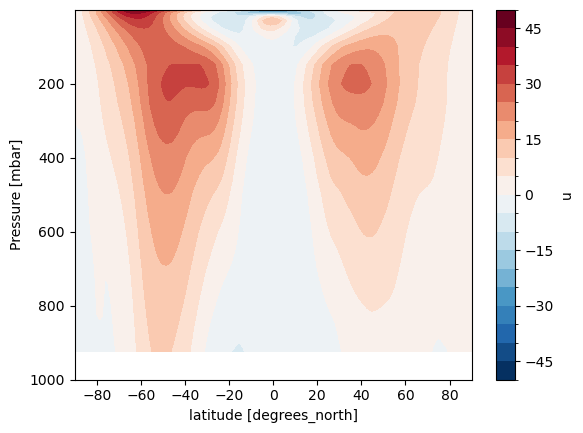

In [13]:
ua = ua.where(ua.level < 1000.)

ua.mean(('lon', 'time')).plot.contourf(levels=20, yincrease=False)